# Module 4

#### Query 1

In [3]:
import pandas as pd
import numpy as np

In [5]:
apple=pd.read_csv('AAPL.csv')

In [6]:
apple.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


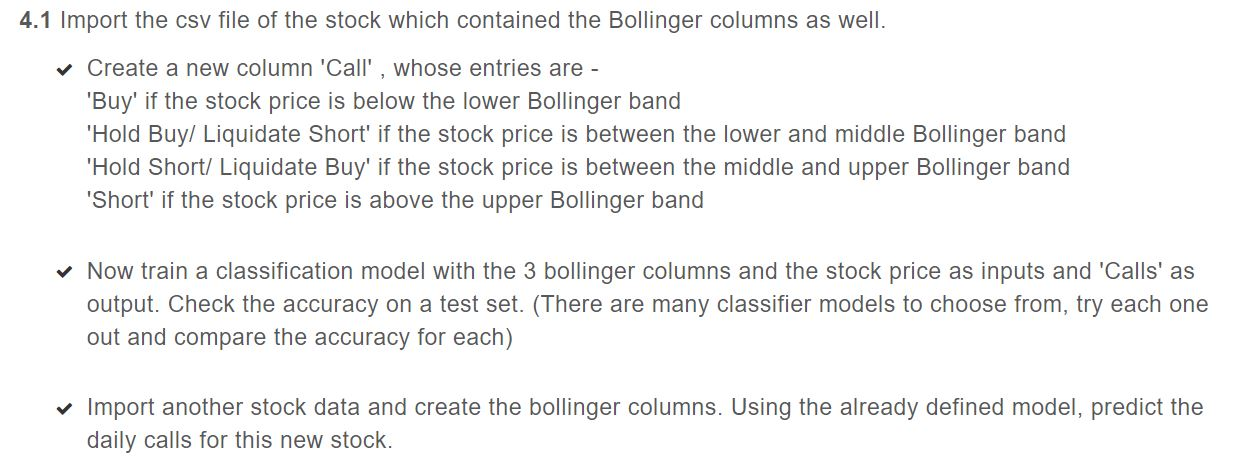

In [7]:
#calculating bollinger bands
upper_band = (apple.rolling(window=14).mean()) +(2 *( apple.rolling(window=20).std()))
lower_band = (apple.rolling(window=14).mean()) - (2 *( apple.rolling(window=20).std()))
middle_band=(upper_band+lower_band)/2


In [8]:
#Making colomns for bands in dataset
apple['upper_band']=upper_band['Close Price']
apple['lower_band']=lower_band['Close Price']
apple['mid_band']=middle_band['Close Price']

In [9]:
#lets look how our dataset turned out
apple=apple.dropna()
apple.head(20)

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,upper_band,lower_band,mid_band
19,"Sep 27, 2019",218.82,220.54,220.96,217.28,25.36M,243.255476,211.675953,227.465714
20,"Sep 26, 2019",219.89,220.00,220.94,218.83,19.09M,241.851975,211.010882,226.431429
21,"Sep 25, 2019",221.03,218.55,221.50,217.14,22.48M,240.001134,210.820295,225.410714
22,"Sep 24, 2019",217.68,221.03,222.49,217.19,31.43M,238.541188,209.681669,224.111429
23,"Sep 23, 2019",218.72,218.95,219.84,217.65,19.42M,236.509704,209.214582,222.862143
24,"Sep 20, 2019",217.73,221.38,222.56,217.47,57.98M,235.376594,208.581977,221.979286
25,"Sep 19, 2019",220.96,222.01,223.76,220.37,22.19M,234.312634,208.778794,221.545714
26,"Sep 18, 2019",222.77,221.06,222.85,219.44,25.64M,233.440556,209.418015,221.429286
27,"Sep 17, 2019",220.70,219.96,220.82,219.12,18.39M,231.933309,210.016691,220.975000
28,"Sep 16, 2019",219.90,217.73,220.13,217.56,21.16M,229.920359,211.013927,220.467143


In [34]:
def call(apple):
    if apple['Close Price'] < apple['lower_band']:
        return 'Buy'
    elif apple['Close Price'] > apple['lower_band'] and apple['Close Price'] < apple['mid_band']:
        return 'Hold Buy/Liquidate Short'
    elif apple['Close Price'] > apple['mid_band'] and apple['Close Price'] < apple['upper_band']:
        return 'Hold Short/Liquidate Buy'
    elif apple['Close Price'] > apple['upper_band']:
        return 'Short'
    
apple = apple.assign(Call = apple.apply(call, axis=1))

In [35]:
apple.head(20)

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,upper_band,lower_band,mid_band,Call
19,"Sep 27, 2019",218.82,220.54,220.96,217.28,25.36M,243.255476,211.675953,227.465714,Hold Buy/Liquidate Short
20,"Sep 26, 2019",219.89,220.00,220.94,218.83,19.09M,241.851975,211.010882,226.431429,Hold Buy/Liquidate Short
21,"Sep 25, 2019",221.03,218.55,221.50,217.14,22.48M,240.001134,210.820295,225.410714,Hold Buy/Liquidate Short
22,"Sep 24, 2019",217.68,221.03,222.49,217.19,31.43M,238.541188,209.681669,224.111429,Hold Buy/Liquidate Short
23,"Sep 23, 2019",218.72,218.95,219.84,217.65,19.42M,236.509704,209.214582,222.862143,Hold Buy/Liquidate Short
24,"Sep 20, 2019",217.73,221.38,222.56,217.47,57.98M,235.376594,208.581977,221.979286,Hold Buy/Liquidate Short
25,"Sep 19, 2019",220.96,222.01,223.76,220.37,22.19M,234.312634,208.778794,221.545714,Hold Buy/Liquidate Short
26,"Sep 18, 2019",222.77,221.06,222.85,219.44,25.64M,233.440556,209.418015,221.429286,Hold Short/Liquidate Buy
27,"Sep 17, 2019",220.70,219.96,220.82,219.12,18.39M,231.933309,210.016691,220.975000,Hold Buy/Liquidate Short
28,"Sep 16, 2019",219.90,217.73,220.13,217.56,21.16M,229.920359,211.013927,220.467143,Hold Buy/Liquidate Short


In [36]:
from sklearn import preprocessing

In [37]:
#Splitting training inputs and outputs
train_X=apple[['upper_band','lower_band','mid_band','Close Price']]
train_y=apple['Call']

In [59]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(solver='lbfgs')
x_scaled=preprocessing.scale(train_X)
logistic.fit(x_scaled,train_y)
logistic.predict(train_X) 
print("Logistic Regression")
logistic.score(train_X,train_y)

Logistic Regression


0.8863636363636364

In [60]:
#support vector machines
from sklearn import svm  

support=svm.LinearSVC()

support.fit(x_scaled,train_y)
support.predict(train_X) 
print("Support Vector Machine")
support.score(train_X,train_y)

Support Vector Machine


0.8471074380165289

In [58]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random= RandomForestClassifier(n_estimators=100, max_depth=7)  

random.fit(train_X,train_y)
random.predict(train_X) 
print("Random Forest")
random.score(train_X,train_y)

Random Forest


0.9524793388429752

After all analysis it is clearly seen that Random Forest fits best.We have observed that as we increase depth score/accuracy increases.And as we know random forest cant overfit so its safer too.
    
    1. Random Forest : 0.95
    2.Logistic Regression:  0.89
    3.Support Vector Machine:  0.85

In [85]:
pvr=pd.read_csv('PVR.csv')
pvr.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67


In [86]:
#calculating bollinger bands
upper_band = (pvr.rolling(window=14).mean()) +(2 *( pvr.rolling(window=20).std()))
lower_band = (pvr.rolling(window=14).mean()) - (2 *( pvr.rolling(window=20).std()))
middle_band=(upper_band+lower_band)/2


In [87]:
#Making colomns for bands in dataset
pvr['upper_band']=upper_band['Close Price']
pvr['lower_band']=lower_band['Close Price']
pvr['mid_band']=middle_band['Close Price']



In [89]:
#making test case
test_x=pvr[['upper_band','lower_band','mid_band','Close Price']]
test_x=test_x.fillna(0)

#Predicting now
pvr['Call']=random.predict(test_x) 

In [83]:
pvr.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_band,lower_band,mid_band,Call
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58,NaN,NaN,NaN,Hold Short/Liquidate Buy
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09,NaN,NaN,NaN,Hold Short/Liquidate Buy
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83,NaN,NaN,NaN,Hold Short/Liquidate Buy
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24,NaN,NaN,NaN,Hold Short/Liquidate Buy
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,NaN,NaN,NaN,Hold Short/Liquidate Buy


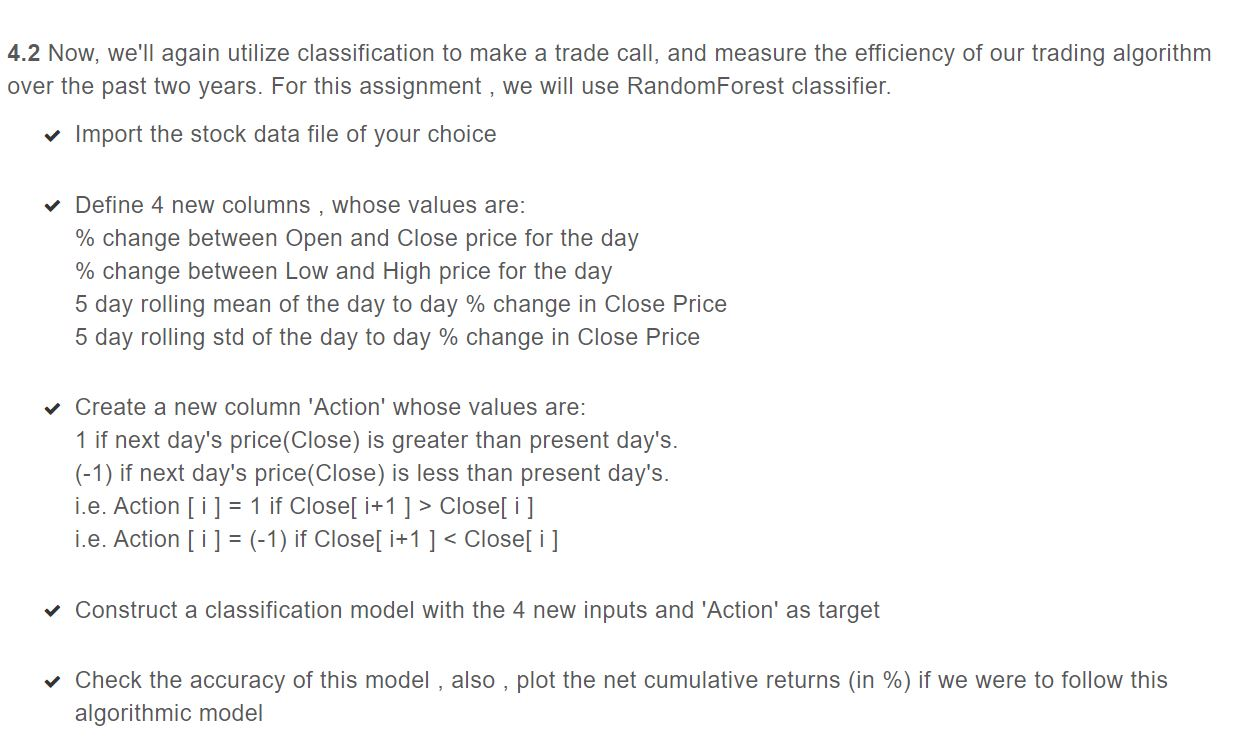

In [4]:
idfc=pd.read_csv('IDFC.csv')
idfc.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,IDFC,EQ,15-May-2017,63.35,63.95,64.35,63.25,63.65,63.70,63.74,2754130,1.755433e+08,10529,1119918,40.66
1,IDFC,EQ,16-May-2017,63.70,64.00,64.60,62.90,64.55,64.25,63.80,4014549,2.561355e+08,12172,1694524,42.21
2,IDFC,EQ,17-May-2017,64.25,64.65,64.65,63.25,63.25,63.35,63.58,4184709,2.660487e+08,6189,2802239,66.96
3,IDFC,EQ,18-May-2017,63.35,62.40,62.60,61.20,61.35,61.50,61.85,6040654,3.736229e+08,14151,2475921,40.99
4,IDFC,EQ,19-May-2017,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28


In [5]:
#creating new columns
idfc['chge_open_close']=((idfc['Close Price']-idfc['Open Price'])/idfc['Close Price'])*100
idfc['chge_low_high']=((idfc['High Price']-idfc['Low Price'])/idfc['High Price'])*100

idfc['rol_mean']=idfc['Close Price'].pct_change().rolling(5).mean()
idfc['rol_std']=idfc['Close Price'].pct_change().rolling(5).std()

In [6]:
idfc.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,chge_open_close,chge_low_high,rol_mean,rol_std
0,IDFC,EQ,15-May-2017,63.35,63.95,64.35,63.25,63.65,63.70,63.74,2754130,1.755433e+08,10529,1119918,40.66,-0.392465,1.709402,NaN,NaN
1,IDFC,EQ,16-May-2017,63.70,64.00,64.60,62.90,64.55,64.25,63.80,4014549,2.561355e+08,12172,1694524,42.21,0.389105,2.631579,NaN,NaN
2,IDFC,EQ,17-May-2017,64.25,64.65,64.65,63.25,63.25,63.35,63.58,4184709,2.660487e+08,6189,2802239,66.96,-2.052092,2.165507,NaN,NaN
3,IDFC,EQ,18-May-2017,63.35,62.40,62.60,61.20,61.35,61.50,61.85,6040654,3.736229e+08,14151,2475921,40.99,-1.463415,2.236422,NaN,NaN
4,IDFC,EQ,19-May-2017,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28,-1.144726,3.210273,NaN,NaN
5,IDFC,EQ,22-May-2017,61.15,61.30,61.70,60.00,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,-1.827243,2.755267,-0.011161,0.013915
6,IDFC,EQ,23-May-2017,60.20,60.30,60.45,57.30,58.20,58.25,58.59,3616589,2.118975e+08,9665,897898,24.83,-3.519313,5.210918,-0.019366,0.011145
7,IDFC,EQ,24-May-2017,58.25,58.20,58.90,56.40,56.75,56.90,57.52,4987978,2.869050e+08,9410,1666628,33.41,-2.284710,4.244482,-0.021199,0.010791
8,IDFC,EQ,25-May-2017,56.90,57.30,58.35,56.20,57.70,57.60,57.54,29243828,1.682797e+09,30826,18794467,64.27,0.520833,3.684662,-0.012898,0.017173
9,IDFC,EQ,26-May-2017,57.60,57.80,59.60,57.50,59.45,59.25,58.79,4264464,2.507168e+08,7597,1994291,46.77,2.447257,3.523490,-0.006031,0.025582


In [12]:
idfc.shape

(495, 19)

In [14]:
#preparing action 
arr = []
close = []
for cl in idfc['Close Price'].iteritems():
    arr.append(cl[1])
for i in range(0,494):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
idfc['Action'] = pd.DataFrame(val)

In [25]:
#dropping nan values
idfc=idfc.dropna()
idfc.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,chge_open_close,chge_low_high,rol_mean,rol_std,Action
5,IDFC,EQ,22-May-2017,61.15,61.3,61.70,60.0,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,-1.827243,2.755267,-0.011161,0.013915,-1.0
6,IDFC,EQ,23-May-2017,60.20,60.3,60.45,57.3,58.20,58.25,58.59,3616589,2.118975e+08,9665,897898,24.83,-3.519313,5.210918,-0.019366,0.011145,-1.0
7,IDFC,EQ,24-May-2017,58.25,58.2,58.90,56.4,56.75,56.90,57.52,4987978,2.869050e+08,9410,1666628,33.41,-2.284710,4.244482,-0.021199,0.010791,1.0
8,IDFC,EQ,25-May-2017,56.90,57.3,58.35,56.2,57.70,57.60,57.54,29243828,1.682797e+09,30826,18794467,64.27,0.520833,3.684662,-0.012898,0.017173,1.0
9,IDFC,EQ,26-May-2017,57.60,57.8,59.60,57.5,59.45,59.25,58.79,4264464,2.507168e+08,7597,1994291,46.77,2.447257,3.523490,-0.006031,0.025582,-1.0


In [29]:
#train and target data
train_x=idfc[['chge_open_close','chge_low_high','rol_mean','rol_std']]
train_y=idfc['Action']

In [31]:
#scaling the data 
from sklearn import preprocessing
train_x=preprocessing.scale(train_x)


In [32]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random= RandomForestClassifier(n_estimators=100, max_depth=7)  

random.fit(train_x,train_y)
random.predict(train_x) 
print("Random Forest")
random.score(train_x,train_y)

Random Forest


0.8834355828220859

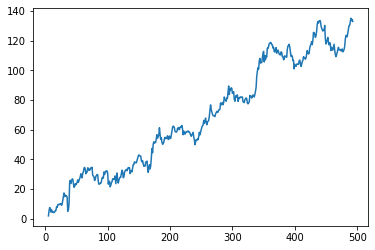

In [37]:
#ploting net cummulative returns
import matplotlib.pyplot as plt
%matplotlib inline

idfc['net_cum_returns'] = (((idfc['Open Price'] - idfc['Close Price'])/(idfc['Open Price']))*100).cumsum()
plt.plot(idfc['net_cum_returns'])